In [1]:
import numpy as np 
from keras.layers import Input, Dense 
from keras.models import Model
from keras.datasets import mnist

load and prepare the MNIST dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# build the autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img) 
decoded = Dense(784, activation='sigmoid')(encoded)

# build the encoder model
encoded_input = Input(shape=(32,))
encoder = Model(input_img, encoded)

autoencoder = Model(input_img, decoded)

decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='mse')

In [5]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.0718 - val_loss: 0.0426
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0357 - val_loss: 0.0298
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0267 - val_loss: 0.0234
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0214 - val_loss: 0.0188
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0177 - val_loss: 0.0159
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0153 - val_loss: 0.0140
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0137 - val_loss: 0.0128
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0127 - val_loss: 0.0119
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0120 - val_loss: 0.0113
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0115 - val_loss: 0.0110

In [6]:
# use the encoder and decoder for inference
encoded_imgs = encoder.predict(x_test) 
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 1ms/step


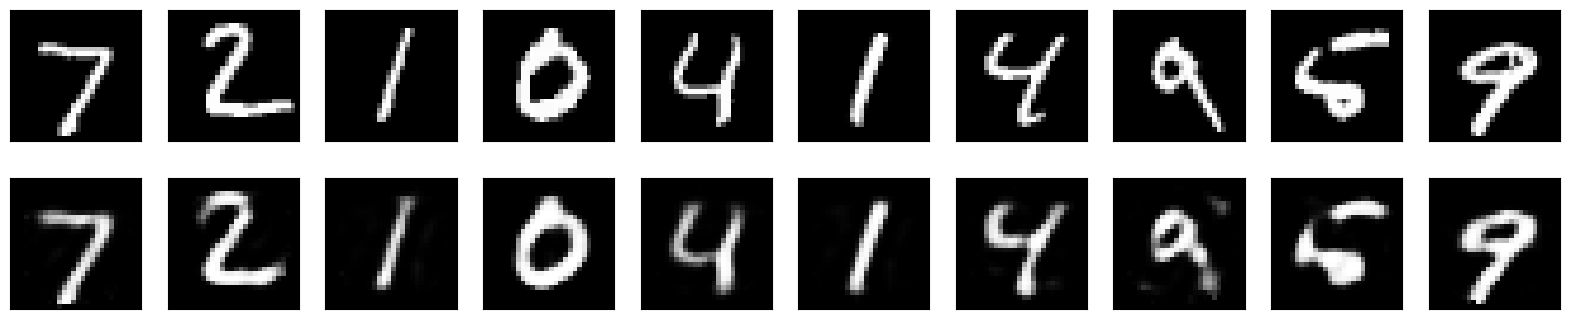

In [7]:
import matplotlib.pyplot as plt
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:
# calculate reconstruction error as anomaly score
mse = np.mean(np.power(x_test - decoded_imgs, 2), axis=1)
error_threshold = 2 * mse.mean() 

In [9]:
# detect anomalies
anomalies = mse > error_threshold
print("Found %d anomalies!" % np.sum(anomalies))

Found 581 anomalies!


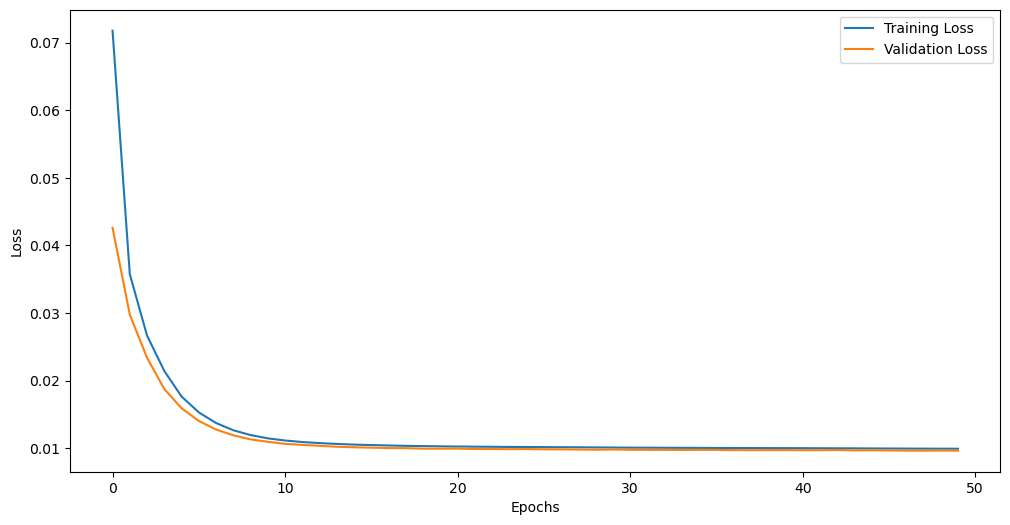

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()